<h1 align="center">MOM6/OM4 mass transports through straits and throughflows</h1> 

Uses Python/3.4.3

This notebook provides example calculations of the mass transport through various sections saved from OM4 simulations.  

This iPython notebook was originally developed at NOAA/GFDL, and it is provided freely to the MOM6 community. GFDL scientists developing MOM6 make extensive use of Python for diagnostics. We solicit modifications/fixes that are useful to the MOM6 community.

In [1]:
import netCDF4
import matplotlib.pyplot as plt
%matplotlib inline
import glob


# data layout for a section is (t,z,y,x)


In [2]:
mks2Sv = 1.0/1e9   

path_static= '/archive/gold/datasets/OM4_025/mosaic.v20140610.unpacked/'
#path_static= '/archive/bls/ulm_201505_awg_v20150923_mom6sis2_2015.11.30/CM4_c96L32_am4g6_2000_sis2_lowmix_hycom1/gfdl.ncrc2-intel-prod-openmp/pp/ocean_annual/'
#path_static = '/archive/Bonnie.Samuels/ulm_201505_4dUpdates_awg_v20150923_mom6sis2_2015.11.12/CM4_c96L32_am4g6_2000_sis2/gfdl.ncrc2-intel-prod-openmp/pp/ocean_annual/'

static = netCDF4.Dataset(path_static+'ocean_static.nc')
for v in static.variables: print (v)
    
# geometric factors 
lon   = static.variables['geolon'][:]
lat   = static.variables['geolat'][:]
nomlon   = static.variables['xq'][:]
nomlat   = static.variables['yq'][:]

#wet   = static.variables['wet'][:,:].filled(0.)
wet   = static.variables['wet'][:]
area  = static.variables['areacello'][:]*wet
#depth = static.variables['deptho'][:]*wet

    

xh
yh
time
xq
yq
areacello
geolon
geolat
geolon_c
geolat_c
geolon_u
geolat_u
geolon_v
geolat_v
wet
wet_c
wet_u
wet_v
dxt
dyt
dxCu
dyCu
dxCv
dyCv


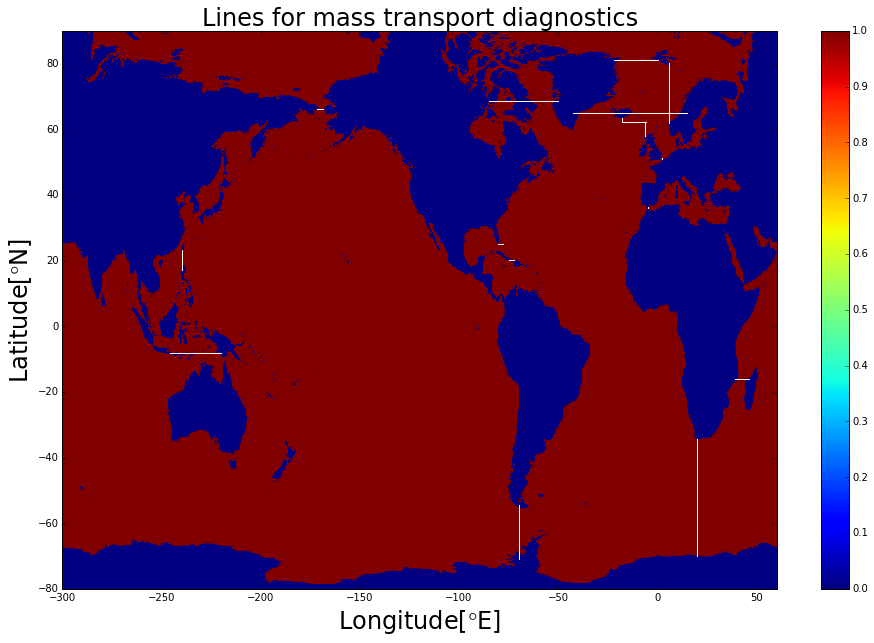

In [3]:
plt.figure(figsize=(16,10))
field = wet
#plt.pcolormesh(lon,lat,field)
plt.pcolormesh(nomlon,nomlat,field)
plt.colorbar()
plt.title('Lines for mass transport diagnostics',fontsize=24) 
plt.xlim(-300,60)
plt.ylim(-80,90)
plt.ylabel(r'Latitude[$\degree$N]',fontsize=24)
plt.xlabel(r'Longitude[$\degree$E]',fontsize=24)
plt.gca().set_axis_bgcolor('gray')
axis = plt.gca()

pth = '/archive/bls/ulm_201505_awg_v20150923_mom6sis2_2015.11.30/CM4_c96L32_am4g6_2000_sis2_lowmix_hycom1/gfdl.ncrc2-intel-prod-openmp/pp/'
for p in glob.glob(pth+'ocean_[A-Z]*'):
    #print(p)
    afile = glob.glob(p+'/ts/120hr/5yr/ocean_*')[0]
    varname=afile.split('.')[-2]
    rg = netCDF4.Dataset(afile)
    #for v in rg.variables: print(v,end=' ')
    eh = rg.variables[varname]
    dims = eh.dimensions
    sx = rg.variables[dims[-1]][:]
    sy = rg.variables[dims[-2]][:]
    plt.plot(sx+0*sy,0*sx+sy,'w')
plt.xlim(-300,60);plt.ylim(-80,90);

In [4]:
path = './'
Agulhas = netCDF4.Dataset(path+'ocean_Agulhas_section.1948010100-1952123123.umo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Agulhas.variables: print(v)

time          = Agulhas.variables['time'][:]*(1/365.0)
trans         = Agulhas.variables['umo'][:]
transA        = trans.sum(axis=1)
trans_Agulhas = mks2Sv*transA.sum(axis=1) 
trans_Agulhas_line = trans[0,0,:,0]
print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Agulhas_line.shape)
print(trans_Agulhas.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
umo
xq_sub01
yh_sub01
zl


(365,)
(365, 75, 249, 1)
(249,)
(365, 1)


In [5]:
path = './'
Barents = netCDF4.Dataset(path+'ocean_Barents_opening.1948010100-1952123123.umo.nc')

# need to save umo not vmo 

print()      
print("VARIABLES IN MAIN FILE")
for v in Barents.variables: print(v)

trans          = Barents.variables['umo'][:]
transA         = trans.sum(axis=1)
trans_Barents  = mks2Sv*transA.sum(axis=1) 
trans_Barents_line = trans[0,0,:,0]
print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Barents_line.shape)
print(trans_Barents.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
umo
xq_sub01
yh_sub01
zl


(365,)
(365, 75, 169, 1)
(169,)
(365, 1)


In [6]:
path = './'
Canada = netCDF4.Dataset(path+'ocean_Canadian_Archipelago.1948010100-1952123123.vmo.nc')

# need to save umo not vmo 

print()      
print("VARIABLES IN MAIN FILE")
for v in Canada.variables: print(v)
    
trans          = Canada.variables['vmo'][:]
transA         = trans.sum(axis=1)
trans_Canada  = mks2Sv*transA.sum(axis=2) 
trans_Canada_line = trans[0,0,0,:]
print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Canada_line.shape)
print(trans_Canada.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
vmo
xh_sub01
yq_sub01
zl


(365,)
(365, 75, 1, 139)
(139,)
(365, 1)


In [7]:
path = './'
Denmark = netCDF4.Dataset(path+'ocean_Denmark_Strait.1948010100-1952123123.vmo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Denmark.variables: print(v)

trans         = Denmark.variables['vmo'][:]
transA        = trans.sum(axis=1)
trans_Denmark = mks2Sv*transA.sum(axis=2) 
trans_Denmark_line = trans[0,0,0,:]
print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Denmark_line.shape)
print(trans_Denmark.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
vmo
xh_sub01
yq_sub01
zl


(365,)
(365, 75, 1, 91)
(91,)
(365, 1)


In [8]:
path = './'
Drake  = netCDF4.Dataset(path+'ocean_Drake_Passage.1948010100-1952123123.umo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Drake.variables: print(v)
    
trans        = Drake.variables['umo'][:]
transA       = trans.sum(axis=1)
trans_Drake  = mks2Sv*transA.sum(axis=1) 
trans_Drake_line = trans[0,0,:,0]
print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Drake_line.shape)
print(trans_Drake.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
umo
xq_sub01
yh_sub01
zl


(365,)
(365, 75, 144, 1)
(144,)
(365, 1)


In [9]:
path = './'
English = netCDF4.Dataset(path+'ocean_English_Channel.1948010100-1952123123.umo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in English.variables: print(v) 

trans        = English.variables['umo'][:]
transA       = trans.sum(axis=1)
trans_English  = mks2Sv*transA.sum(axis=1) 
trans_English_line = trans[0,0,:,0]
print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_English_line.shape)
print(trans_English.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
umo
xq_sub01
yh_sub01
zl


(365,)
(365, 75, 3, 1)
(3,)
(365, 1)


In [10]:
path = './'
Faroe_Scot = netCDF4.Dataset(path+'ocean_Faroe_Scotland.1948010100-1952123123.umo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Faroe_Scot.variables: print(v) 

trans        = Faroe_Scot.variables['umo'][:]
transA       = trans.sum(axis=1)
trans_Faroe_Scot  = mks2Sv*transA.sum(axis=1) 
trans_Faroe_Scot_line = trans[0,0,:,0]
print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Faroe_Scot_line.shape)
print(trans_Faroe_Scot.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
umo
xq_sub01
yh_sub01
zl


(365,)
(365, 75, 33, 1)
(33,)
(365, 1)


In [11]:
path = './'
Florida = netCDF4.Dataset(path+'ocean_Florida_Bahamas.1948010100-1952123123.vmo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Florida.variables: print(v) 

trans        = Florida.variables['vmo'][:]
transA       = trans.sum(axis=1)
trans_Florida  = mks2Sv*transA.sum(axis=2) 
trans_Florida_line = trans[0,0,0,:]
print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Florida_line.shape)
print(trans_Florida.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
vmo
xh_sub01
yq_sub01
zl


(365,)
(365, 75, 1, 12)
(12,)
(365, 1)


In [12]:
path = './'
Fram = netCDF4.Dataset(path+'ocean_Fram_Strait.1948010100-1952123123.vmo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Fram.variables: print(v) 

trans        = Fram.variables['vmo'][:]
transA       = trans.sum(axis=1)
trans_Fram   = mks2Sv*transA.sum(axis=2) 
trans_Fram_line = trans[0,0,0,:]
print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Fram_line.shape)
print(trans_Fram.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
vmo
xh_sub01
yq_sub01
zl


(365,)
(365, 75, 1, 89)
(89,)
(365, 1)


In [13]:
path = './'
Gibraltar = netCDF4.Dataset(path+'ocean_Gibraltar_Strait.1948010100-1952123123.umo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Gibraltar.variables: print(v) 

trans        = Gibraltar.variables['umo'][:]
transA       = trans.sum(axis=1)
trans_Gibraltar   = mks2Sv*transA.sum(axis=1) 
trans_Gibraltar_line = trans[0,0,:,0]
print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Gibraltar_line.shape)
print(trans_Gibraltar.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
umo
xq_sub01
yh_sub01
zl


(365,)
(365, 75, 3, 1)
(3,)
(365, 1)


In [14]:
path = './'
Iceland_Faroe_U = netCDF4.Dataset(path+'ocean_Iceland_Faroe_U.1948010100-1952123123.umo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Iceland_Faroe_U.variables: print(v) 

transU     = Iceland_Faroe_U.variables['umo'][:]
transA     = transU.sum(axis=1)
trans_Iceland_Faroe_U = mks2Sv*transA.sum(axis=1) 
trans_Iceland_Faroe_U_line = transU[0,0,:,0]

print() 
print()
print(time.shape) 
print(transU.shape)
print(trans_Iceland_Faroe_U_line.shape)
print(trans_Iceland_Faroe_U.shape)

path = './'
Iceland_Faroe_V = netCDF4.Dataset(path+'ocean_Iceland_Faroe_V.1948010100-1952123123.vmo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Iceland_Faroe_V.variables: print(v) 

transV     = Iceland_Faroe_V.variables['vmo'][:]
transA     = transV.sum(axis=1)
trans_Iceland_Faroe_V = mks2Sv*transA.sum(axis=2) 
trans_Iceland_Faroe_V_line = transV[0,0,0,:]

trans_Iceland_Faroe = trans_Iceland_Faroe_U + trans_Iceland_Faroe_V

print() 
print()
print(time.shape) 
print(transV.shape)
print(trans_Iceland_Faroe_V_line.shape)
print(trans_Iceland_Faroe_V.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
umo
xq_sub01
yh_sub01
zl


(365,)
(365, 75, 12, 1)
(12,)
(365, 1)

VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
vmo
xh_sub01
yq_sub01
zl


(365,)
(365, 75, 1, 49)
(49,)
(365, 1)


In [15]:
path = './'
Iceland_Norway = netCDF4.Dataset(path+'ocean_Iceland_Norway.1948010100-1952123123.vmo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Iceland_Norway.variables: print(v) 

trans        = Iceland_Norway.variables['vmo'][:]
transA       = trans.sum(axis=1)
trans_Iceland_Norway = mks2Sv*transA.sum(axis=2) 
trans_Iceland_Norway_line = trans[0,0,0,:]

print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Iceland_Norway_line.shape)
print(trans_Iceland_Norway.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
vmo
xh_sub02
yq_sub02
zl


(365,)
(365, 75, 1, 141)
(141,)
(365, 1)


In [16]:
path = './'
Indo = netCDF4.Dataset(path+'ocean_Indonesian_Throughflow.1948010100-1952123123.vmo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Indo.variables: print(v) 

trans        = Indo.variables['vmo'][:]
transA       = trans.sum(axis=1)
trans_Indo = mks2Sv*transA.sum(axis=2) 
trans_Indo_line = trans[0,0,0,:]

print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Indo_line.shape)
print(trans_Indo.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
vmo
xh_sub01
yq_sub01
zl


(365,)
(365, 75, 1, 105)
(105,)
(365, 1)


In [17]:
path = './'
Moz = netCDF4.Dataset(path+'ocean_Mozambique_Channel.1948010100-1952123123.vmo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Moz.variables: print(v) 

trans        = Moz.variables['vmo'][:]
transA       = trans.sum(axis=1)
trans_Moz = mks2Sv*transA.sum(axis=2) 
trans_Moz_line = trans[0,0,0,:]

print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Moz_line.shape)
print(trans_Moz.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
vmo
xh_sub01
yq_sub01
zl


(365,)
(365, 75, 1, 29)
(29,)
(365, 1)


In [18]:
path = './'
PEUC = netCDF4.Dataset(path+'ocean_Pacific_undercurrent.1948010100-1952123123.umo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in PEUC.variables: print(v) 

trans        = PEUC.variables['umo'][:]
transA       = trans.sum(axis=1)
trans_PEUC = mks2Sv*transA.sum(axis=1) 
trans_PEUC_line = trans[0,0,:,0]

print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_PEUC_line.shape)
print(trans_PEUC.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
umo
xq_sub01
yh_sub01
zl


(365,)
(365, 75, 1, 1)
(1,)
(365, 1)


In [19]:
path = './'
Taiwan = netCDF4.Dataset(path+'ocean_Taiwan_Luzon.1948010100-1952123123.umo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Taiwan.variables: print(v) 

trans        = Taiwan.variables['umo'][:]
transA       = trans.sum(axis=1)
trans_Taiwan = mks2Sv*transA.sum(axis=1) 
trans_Taiwan_line = trans[0,0,:,0]

print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Taiwan_line.shape)
print(trans_Taiwan.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
umo
xq_sub01
yh_sub01
zl


(365,)
(365, 75, 27, 1)
(27,)
(365, 1)


In [23]:
path = './'
Windward = netCDF4.Dataset(path+'ocean_Windward_Passage.1948010100-1952123123.vmo.nc')

print()      
print("VARIABLES IN MAIN FILE")
for v in Windward.variables: print(v) 

trans        = Windward.variables['vmo'][:]
transA       = trans.sum(axis=1)
trans_Windward = mks2Sv*transA.sum(axis=2) 
trans_Windward_line = trans[0,0,0,:]

print() 
print()
print(time.shape) 
print(trans.shape)
print(trans_Windward_line.shape)
print(trans_Windward.shape)



VARIABLES IN MAIN FILE
average_DT
average_T1
average_T2
nv
time
time_bounds
vmo
xh_sub01
yq_sub01
zl


(365,)
(365, 75, 1, 11)
(11,)
(365, 1)


In [24]:
# for easy setup of subplots
def newSP(y,x):
    global __spv, __spi ; __spv = (y,x) ; __spi = 1 ; plt.subplot(__spv[0], __spv[1], __spi)
def nextSP():
    global __spv, __spi ; __spi = __spi + 1 ; plt.subplot(__spv[0], __spv[1], __spi)

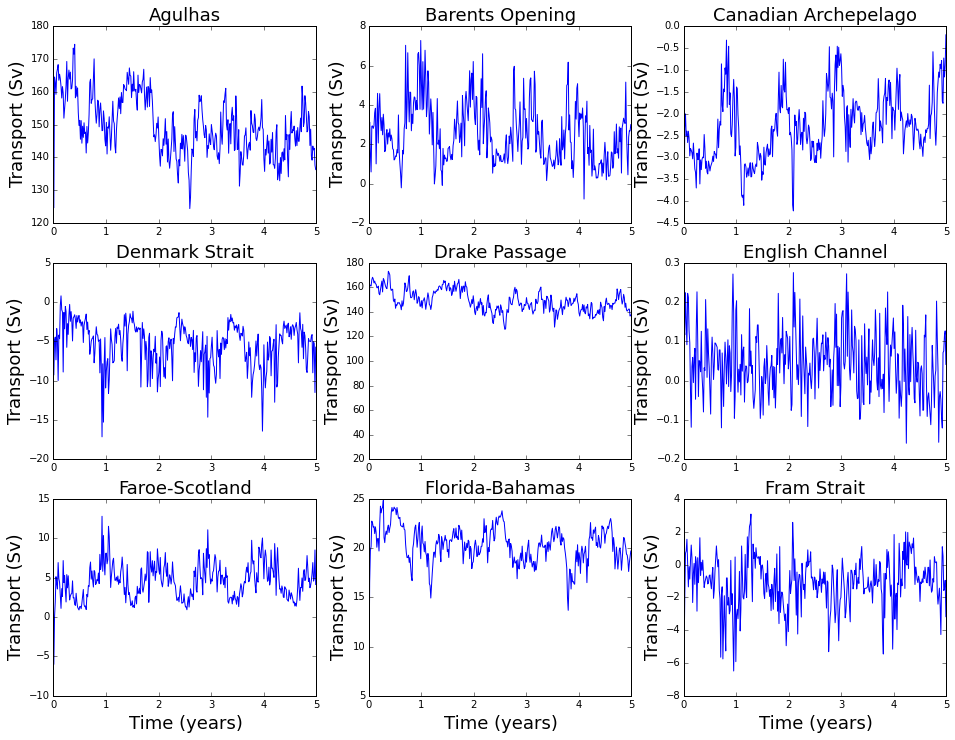

In [26]:
plt.figure(figsize=(16,12))
newSP(3,3)

plt.subplot(331);
plt.plot(time, trans_Agulhas);
plt.title(r'Agulhas',fontsize=18)
#plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(332);
plt.plot(time, trans_Barents);
plt.title(r'Barents Opening',fontsize=18)
#plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(333);
plt.plot(time, trans_Canada);
plt.title(r'Canadian Archepelago',fontsize=18)
#plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(334);
plt.plot(time, trans_Denmark);
plt.title(r'Denmark Strait',fontsize=18)
#plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(335);
plt.plot(time, trans_Drake);
plt.title(r'Drake Passage',fontsize=18)
#plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(336);
plt.plot(time, trans_English);
plt.title(r'English Channel',fontsize=18)
#plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(337);
plt.plot(time, trans_Faroe_Scot);
plt.title(r'Faroe-Scotland',fontsize=18)
plt.xlabel('Time (years)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(338);
plt.plot(time, trans_Florida);
plt.title(r'Florida-Bahamas',fontsize=18)
plt.xlabel('Time (years)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(339);
plt.plot(time, trans_Fram);
plt.title(r'Fram Strait',fontsize=18)
plt.xlabel('Time (years)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);







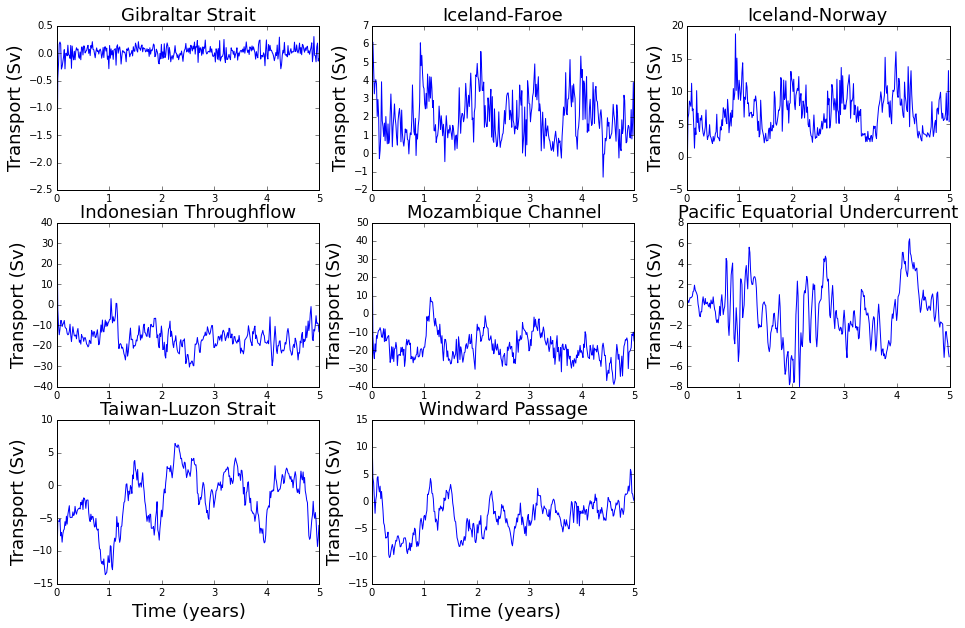

In [27]:
plt.figure(figsize=(16,10))
newSP(3,3)

plt.subplot(331);
plt.plot(time, trans_Gibraltar);
plt.title(r'Gibraltar Strait',fontsize=18)
#plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(332);
plt.plot(time, trans_Iceland_Faroe);
plt.title(r'Iceland-Faroe',fontsize=18)
#plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(333);
plt.plot(time, trans_Iceland_Norway);
plt.title(r'Iceland-Norway',fontsize=18)
#plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(334);
plt.plot(time, trans_Indo);
plt.title(r'Indonesian Throughflow',fontsize=18)
#plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(335);
plt.plot(time, trans_Moz);
plt.title(r'Mozambique Channel',fontsize=18)
#plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(336);
plt.plot(time, trans_PEUC);
plt.title(r'Pacific Equatorial Undercurrent',fontsize=18)
#plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(337);
plt.plot(time, trans_Taiwan);
plt.title(r'Taiwan-Luzon Strait',fontsize=18)
plt.xlabel('Time (years)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);

plt.subplot(338);
plt.plot(time, trans_Windward);
plt.title(r'Windward Passage',fontsize=18)
plt.xlabel('Time (years)',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18);


